In [16]:
import pandas as pd
import matplotlib.pyplot as plt #gorsellestirme kutuphanesi
import seaborn as sns #gorsellestirme kutuphanesi (daha renkli)

In [2]:
df = pd.read_csv("employee_churn_data.csv")
df.head(2)

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   object 
 5   tenure         9540 non-null   float64
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 745.4+ KB


In [4]:
df["left"].value_counts(normalize=True)*100

no     70.81761
yes    29.18239
Name: left, dtype: float64

## Key insights - 1
Personelin neredeyse %30'u son 24 ayda çalkalandı, bu da tüm departmanlarda beceri ve bilgi boşluklarına yol acmis olabilir

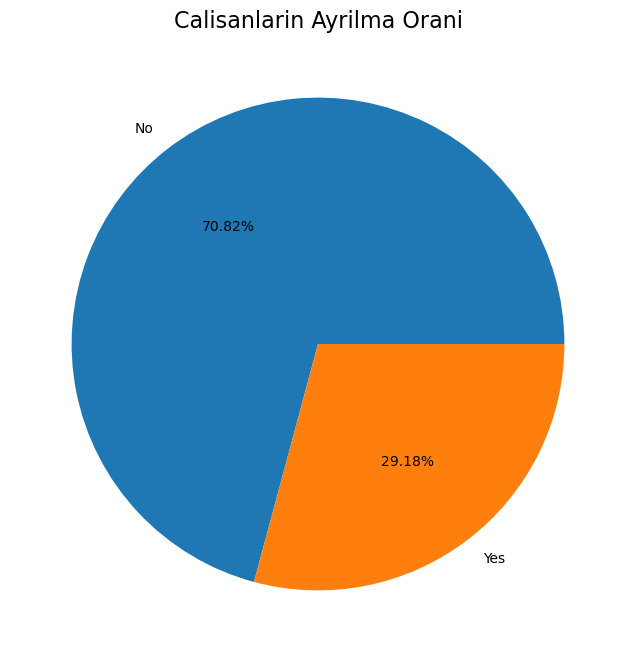

In [14]:
plt.figure(figsize = (10,8)) #grafigimizin buyuklugunu ayarliyor
plt.pie(df["left"].value_counts(),labels=["No","Yes"],autopct="%.02f%%") # virgulden sonra iki basamak
plt.title("Calisanlarin Ayrilma Orani", fontsize = 16)
plt.show() #grafikleri sonlandirmak icin kullanilir
# gorsellestirmek icin import matplotlib.pyplot as plt yaptik ve plt kullniyoruz.

## Key insights - 2
Ayrılan personelin çoğu, yeniden eğitilmesi zaman alan paha biçilmez becerileri temsil eden şirkette en az 5 yıl çalışmış

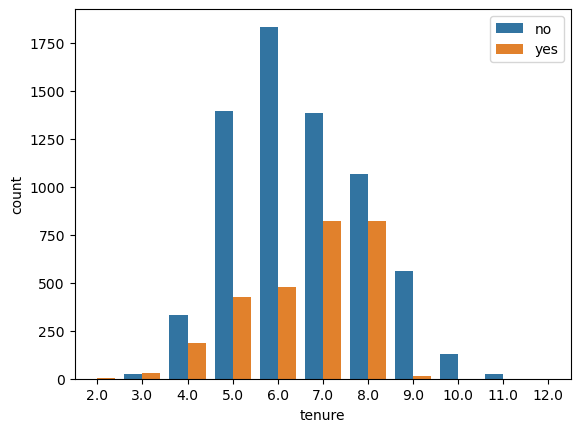

In [25]:
sns.countplot(data=df,x=df["tenure"], hue = df["left"])
plt.legend(loc = 1) # sag kosedeki no yes in yerini ayarliyor loc = 2 sol,loc=3 solalt, loc = 4 sag alt
plt.show()
# hue = df["left"] gruplama yapti

In [26]:
def left_by_tenure(df,low,high):
    df_in = df[(df["tenure"]<=high) & (df["tenure"]>=low)]["left"].value_counts()
    df_out = df[~((df["tenure"]<=high) & (df["tenure"]>=low))]["left"].value_counts()
    return (df_in/(df_in+df_out))["yes"]

In [27]:
left_by_tenure(df,5,8) # 5 ve 8.yillar arasindaki calisanlarin ayrilma yuzdeligi
# tenure sutunu deneyim yili

0.9166666666666666

In [31]:
left_by_tenure(df,4,8)

0.9834770114942529

In [32]:
df.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


In [34]:
df.groupby(["tenure", "left"]).size().reset_index()

,tenure,left,0
0,2.0,no,1
1,2.0,yes,2
2,3.0,no,27
3,3.0,yes,30
4,4.0,no,332
5,4.0,yes,186
6,5.0,no,1395
7,5.0,yes,428
8,6.0,no,1835
9,6.0,yes,478


In [38]:
df_tenure = df.groupby(["tenure", "left"]).size().reset_index().pivot(columns = "tenure", index = "left", values = 0)
df_tenure
# 2.yol --> df.groupby(["tenure", "left"]).left.agg("count")

tenure,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
left,,,,,,,,,,,
no,1.0,27.0,332.0,1395.0,1835.0,1386.0,1065.0,564.0,127.0,23.0,1.0
yes,2.0,30.0,186.0,428.0,478.0,823.0,823.0,14.0,NaN,NaN,NaN


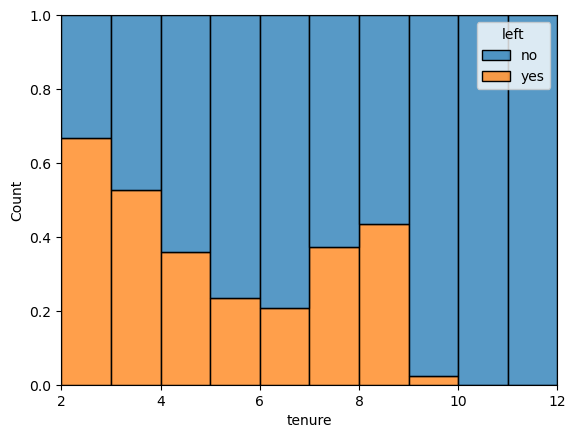

In [41]:
sns.histplot(x = "tenure", hue= "left", multiple= "fill", data = df, binwidth=1);
# sondaki noktali virgul grafigin uzerindeki yazilari kaldiriyor

In [43]:
df["department"].value_counts()

sales          1883
retail         1541
operations     1522
engineering    1516
marketing       802
support         735
admin           423
finance         402
logistics       360
IT              356
Name: department, dtype: int64

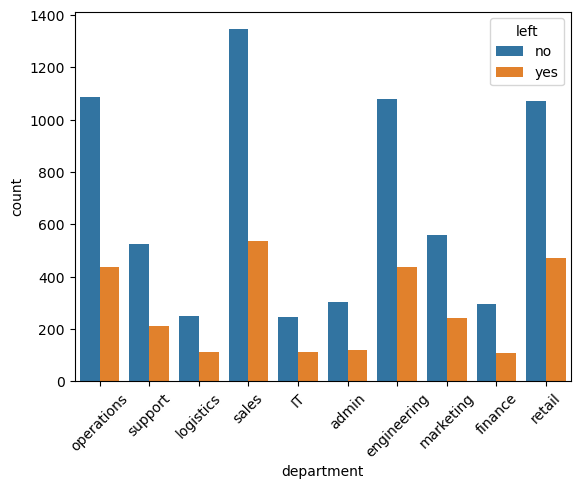

In [47]:
sns.countplot(data = df, x = df["department"], hue=df["left"])
plt.xticks(rotation=45); # yatay eksendeki sutun adlarinin acisini ayarliyor

## Key insights - 2
Ayrılan personeli tanımlayan önemli özellikler, terfi veya ikramiye olmaması, şirket ortalama performans incelemelerinin (0,69) üzerinde olması ve daha uzun çalışma eğilimi,

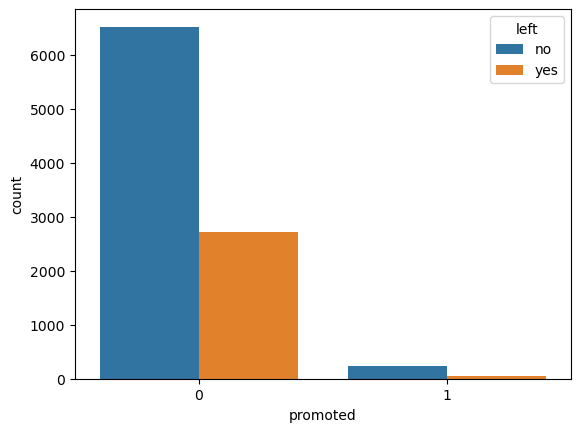

In [51]:
sns.countplot(data=df, x=df["promoted"],hue=df["left"]);

In [54]:
df["promoted"].value_counts(normalize=True)*100
# promoted=terfi

0    96.97065
1     3.02935
Name: promoted, dtype: float64

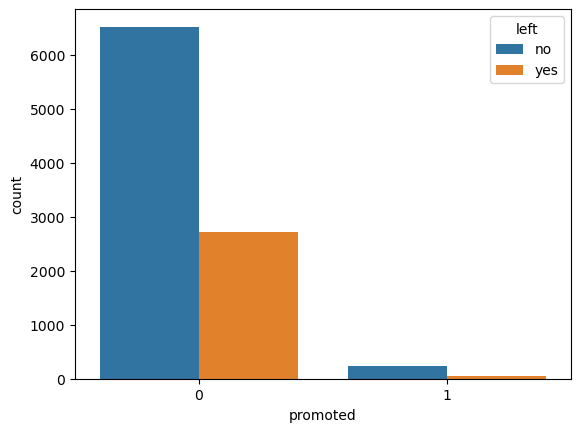

In [52]:
sns.countplot(data=df, x=df["promoted"],hue=df["left"]);


In [53]:
df["bonus"].value_counts()

0    7517
1    2023
Name: bonus, dtype: int64